# Problem 1

Let 
$
A =
\begin{pmatrix}
1    & q     \\ 
0               & 1                      \\ 
\end{pmatrix}
$
with  $q \in \mathrm{R}$. 
* For any $q$, find condition number  $k(A_q)$ with respect to the $l_2$-norm.
* Give an example of specific values of  $q, b, \Delta b$ such that, when solving  $A_q x = b$ and  $ A_q(x+\Delta x)=b+ \Delta b$, we get 

$$ \frac{||\Delta x ||} {||x ||} \geq 10^6 \frac{||\Delta b ||} {||b||}$$
 


### a) 
Formula for condition number:
$$k(A_q)  = \sqrt{\frac{\lambda_\max(A^*A)}{\lambda_\min(A^*A)}}$$
In this case:
$$A^*A = A^T A = \begin{pmatrix}
1 & q\\ 
q & q^2+1\\ 
\end{pmatrix}$$
Eigenvalues:
$$det \begin{pmatrix}
1 - \lambda & q\\ 
q & q^2+1 - \lambda\\ 
\end{pmatrix} = \lambda^2 - \lambda(2+q^2) +1$$
Thus: $$ \lambda_\pm = 0.5 \left(2+q^2 \pm |q| \sqrt{4+q^2}  \right)$$
Obviously, that $\lambda_+ \geq \lambda_-$, then:
$$k(A_q) = \sqrt{\frac{2+q^2 + |q| \sqrt{4+q^2}}{2+q^2 - |q| \sqrt{4+q^2}}} = 0.5 \left( 2+q^2 + |q| \sqrt{4+q^2} \right)$$

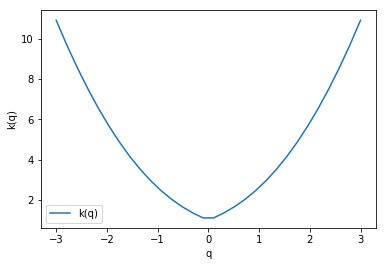

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def k(q):
    return 0.5 * (2 + q ** 2 + np.abs(q) * np.sqrt(4 + q ** 2))

x  = np.linspace(-3, 3, 30)
plt.plot(x, k(x), label = 'k(q)')
plt.xlabel('q')
plt.ylabel('k(q)')
plt.legend(loc='best')

We can see that the matrix is well-conditioned when $q$ close to 0

### b)
To solve this problem first of all I denoted the variables like:
\begin{align}
\begin{pmatrix}
1 & q\\ 
0 & 1\\ 
\end{pmatrix}
\begin{pmatrix}
a \\ 
b \\ 
\end{pmatrix}
= \begin{pmatrix}
a+bq\\ 
b\\ 
\end{pmatrix}
&&
\begin{pmatrix}
1 & q\\ 
0 & 1\\ 
\end{pmatrix}
\begin{pmatrix}
a + \alpha \\ 
b + \beta \\ 
\end{pmatrix}
= \begin{pmatrix}
(a+bq) + (\alpha + \beta q)\\ 
(b) + (\beta)\\ 
\end{pmatrix}
\end{align}
Thus, we can write inequality:
$$\frac{\alpha^2 + \beta^2}{a^2 + b^2} \geq 10^{12} \frac{\alpha^2 + 2\beta \alpha q + \beta^2 q^2 + \beta^2}{a^2 + 2abq + b^2 q^2 + b^2}$$

The simple way to understand what values do we need to choose is denote $q = - \frac{\alpha} {\beta}$:
$$\Rightarrow \frac{\alpha^2 + \beta^2}{a^2 + b^2} \geq 10^{12} \frac{\beta^2}{a^2 + 2abq + b^2 q^2 + b^2}$$

Here we can see that if $q$ enough big and $|\beta|$ smaller than $|\alpha|$ we will be able to solve this inequality.

Below, I programmed the procedure that can find such minimal $q$ and $b, \Delta b$ (when you have $x$ and $\Delta x$) that will satisfy the inequality

In [2]:
def printResult(q, x, dx, b, db):
    A = [[1, q], [0, 1]]
    print('|', A[0][0], '%+5s' % A[0][1], '| * |', '%+5s' % x[0], '| = |', '%+6s' % b[0], '|' )
    print('|', A[1][0], '%+5s' % A[1][1], '|   |', '%+5s' % x[1], '|   |', '%+6s' % b[1], '|' )
    print()
    print('|', A[0][0], '%+5s' % A[0][1], '| * |', '%+5s' % x[0], ' + ', '%+22s' % dx[0], '| = |', '%+6s' % b[0], '+', '%+22s' % db[0], '|' )
    print('|', A[1][0], '%+5s' % A[1][1], '|   |', '%+5s' % x[1], ' + ', '%+22s' % dx[1], '|   |', '%+6s' % b[1], '+', '%+22s' % db[1], '|' )
    print()
    print('|dx| = ', L2_norm(dx))
    print(' |x| = ', L2_norm(x))
    print('|db| = ', L2_norm(db))
    print(' |b| = ', L2_norm(b))
    print()
    print('left = ', L2_norm(dx) / L2_norm(x))
    print('more than')
    print('right = ', 1e6 * L2_norm(db) / L2_norm(b))

def L2_norm(vec):
    return np.sqrt(np.square(vec).sum())

def findMinimal_q(x, alpha):
    assert len(x) == 2
    assert x[1] != 0
    x = np.array(x)
    q = 1
    
    while True:
        A = [[1, q], [0, 1]]
        dx = [alpha, - alpha / q]
        b = np.dot(A, x)
        db = b - np.dot(A, x + dx)

        left = L2_norm(dx) / L2_norm(x) 
        right = L2_norm(db) / L2_norm(b)
        if left >= 1e6 * right:
            return q, x, dx, b, db
        
        if q == 1e5:
            print("Not found!!!")
            return False
        q += 1

        
# Here you need just put the vector x and dx.
# It will find suitable b and db
printResult(*findMinimal_q([1,1], -100))

| 1  1189 | * |     1 | = |   1190 |
| 0     1 |   |     1 |   |      1 |

| 1  1189 | * |     1  +                    -100 | = |   1190 +     -2.27373675443e-13 |
| 0     1 |   |     1  +     0.08410428931875526 |   |      1 +       -0.0841042893188 |

|dx| =  100.000035368
 |x| =  1.41421356237
|db| =  0.0841042893188
 |b| =  1190.00042017

left =  70.7107031274
more than
right =  70.6758484227


# Problem 2

Write a program to compute an approximate value for the derivative of a function using the finite-difference formula
$$f′(x) \approx \frac{f(x+h)−f(x)}{h}$$.
 
* Test your program using the function  $\tan(x)$ at  $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of  $h$, for  $h=10^{−k},k=0, \dots,16$. You should use log scale for  $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.
* Repeat the exercise using the centered difference approximation $$f′(x) \approx  \frac{f(x+h)−f(x−h)}{2h}$$
 
What is now different and why?

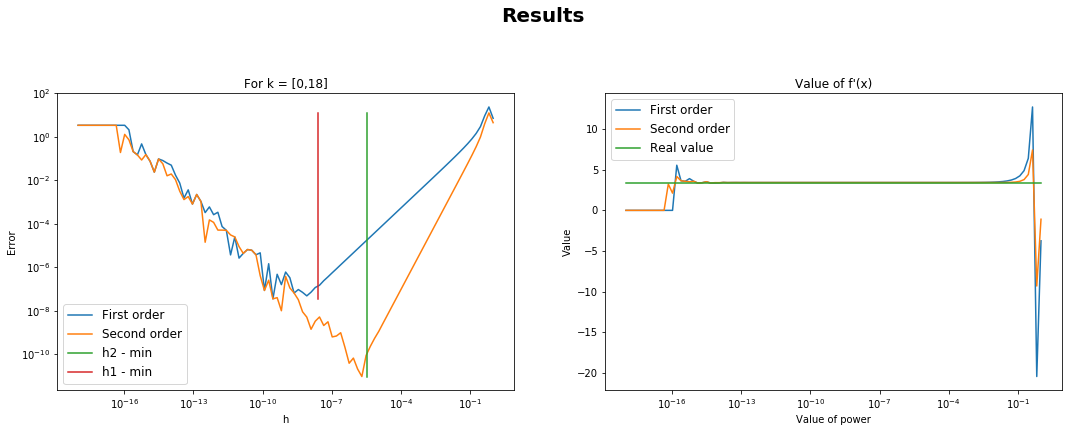

In [3]:
from math import tan, cos, sin
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# In python we have 15 significant digits, then e = 1e-15

def get_2der(x):
    return 2 * sin(x) / (cos(x) ** 3)

def get_3der(x):
    return - 2 * (-2 + cos(2 * x)) / (cos(x) ** 4)

def h1_min(x, e=1e-15):
    return np.power(4 * e * tan(x) / get_2der(x), 1 / 2)

def h2_min(x, e=1e-15):
    return np.power(1.5 * e * tan(x) /  get_3der(x), 1 / 3)

def getDerivative(f, x, h):
    return (f(x + h) - f(x)) / h

def getDerivative_2h(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

h1, h2 = h1_min(1), h2_min(1)

data = [[], [], []]
N = 100
L = 18
hs = []
for k in np.linspace(0, L, N-1):#range(0, N-1):
    data[0].append(getDerivative(tan, 1, 1 / np.power(10, k)))
    data[1].append(getDerivative_2h(tan, 1, 1 / np.power(10, k)))
    data[2].append(1 / (cos(1) ** 2))
    hs.append(1 / np.power(10, k))

data = np.array(data)

fig = plt.figure(figsize=(18,12))
fig.suptitle('Results', fontsize=20, fontweight='bold')
ax1 = fig.add_subplot(221)
plt.title('For k = [0,' + str(L) + ']')
plt.plot(hs, np.abs(data[2] - data[0]), label = 'First order')
plt.plot(hs, np.abs(data[2] - data[1]), label = 'Second order')
plt.plot([h2] * (N - 1), np.linspace(np.min(np.abs(data[2] - data[1])), \
                                     np.max(np.abs(data[2] - data[1])), N - 1), label = 'h2 - min')
plt.plot([h1] * (N - 1), np.linspace(np.min(np.abs(data[2] - data[0])), \
                                     np.max(np.abs(data[2] - data[1])), N - 1), label = 'h1 - min')
ax1.set_xlabel('h')
ax1.set_ylabel('Error')
plt.legend(loc='best', prop={'size': 12})
plt.yscale('log')
plt.xscale('log')

ax3 = fig.add_subplot(222)
plt.title("Value of f'(x)")
plt.plot(hs, data[0], label = 'First order')
plt.plot(hs, data[1], label = 'Second order')
plt.plot(hs, data[2], label = 'Real value')
ax3.set_xlabel('Value of power')
ax3.set_ylabel('Value')
plt.xscale('log')
plt.legend(loc='best', prop={'size': 12})

Theoretical conclusions:
\begin{align}
f′(x) &=  \frac{f(x+h)−f(x)}{h}  + O(h)\\
f′(x) &=  \frac{f(x+h)−f(x−h)}{2h} + O (h^2)
\end{align}
Hence, we have 2 formula with difference type of order.

Now we can find the minumum h that can be achieved.
First of all, we have 2 type of errors:
* error of approximation
* measurement error

|               | Forward  derivative |  Symmetric derivative |
| - |
| Approximation error | $$\frac{hf''(x)}{2}$$  | $$\frac{h^2 f'''(x)}{3}$$  |
| Measurement error  |$$\frac{2 \varepsilon f(x)}{h}$$| $$\frac{\varepsilon f(x)}{h}$$ |

Then we can get sum of errors:
\begin{align}
S_1(h) = \frac{hf''(x)}{2} + \frac{2 \varepsilon f(x)}{h} && S_2(h) = \frac{h^2 f'''(x)}{3} + \frac{2 \varepsilon f(x)}{h}
\end{align}
Thus:

\begin{align}
h_1^\min = \sqrt{ \left|\frac{4 \varepsilon f(x)}{ f''(x)} \right|}  && h_2^\min = \sqrt[3]{\left| \frac{3 \varepsilon f(x)}{ 2 f'''(x)} \right |}
\end{align}

These result are showed above by green and red lines

# Problem 3

Suppose that we use the Leapfrog algorithm with some  $\Delta t$ to simulate the dynamics of the harmonic oscillator with the Hamiltonian function  $H=\frac{mx^2}{2}+\frac{kx^2}{2}$, with positive constants  $m, k$. Assuming a perfect implementation of Leapfrog, at which combinations of  $\Delta t, m, k$ will the simulation diverge as $n \rightarrow \infty$, in the sense that $\sup_n(x^2_n+v^2_{n+1/2})=\infty $?

We have the following equations:

\begin{align}
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1/2} &= \tilde v_{n-1/2}-\frac{k}{m}x_n\Delta t
\end{align}

Henc (1 eq): $$v_{n+1/2} = \frac{x_{n+1} - x_n}{\Delta t}$$
Then: $$\frac{x_{n+1} - 2x_n +x_{n-1}}{\Delta t} = - \frac{k}{m} x_n \Delta t$$
Thus: $$x_{n+1} + \left(\frac{k \Delta t^2}{m}  -2\right) x_n  + x_{n-1} = 0$$
Now we can use spectral method: $x_n = \lambda^n, \; n = [0, \dots, N]$
$$\lambda^2 + \left(\frac{k \Delta t^2}{m}  -2\right) \lambda + 1 = 0$$
The roots of the equation:
$$\lambda_{1,2} = 0.5 \left(2 - \gamma \pm \sqrt{\gamma(\gamma-4)} \right), \; \text{where } \gamma = \frac{k \Delta t^2}{m} $$

The same results we can get for variable $v_{n+1/2}$. That's why $\sup_n(x^2_n+v^2_{n+1/2})=\infty \Longleftrightarrow \sup_n(x^2_n)=\infty  \Longleftrightarrow \sup_n|x_n| = \infty$. So enough to investigate the conditions of convergence of this scheme for variable x.

$\sup_n |x_n| = \sup_n |\lambda^n| = \infty$. Hence if $|\lambda| > 1$ then the scheme doesn't converge.

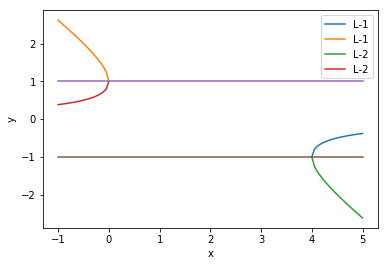

In [4]:
def lambda_1(x):
    return (2-x + np.sqrt(x * (x-4))) / 2 

def lambda_2(x):
    return (2-x - np.sqrt(x * (x-4))) / 2 

x1 = np.linspace(4, 5, 20)
x2 = np.linspace(0, -1, 20)
x  = np.linspace(-1, 5, 20)
plt.plot(x1, lambda_1(x1), label = 'L-1')
plt.plot(x2, lambda_1(x2), label = 'L-1')
plt.plot(x1, lambda_2(x1), label = 'L-2')
plt.plot(x2, lambda_2(x2), label = 'L-2')
plt.plot(x, np.ones_like(x))
plt.plot(x, -np.ones_like(x))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

This plot shows that for real numbers one of them is $ |\lambda_i| > 1$. Thus $\gamma$ ($\gamma > 0$ according to the problem) must be more than 4:
$$\frac{k \Delta t^2}{m} > 4 \Longleftrightarrow \Delta t> 2\sqrt{\frac{m}{k}}$$

Note: this scheme is converging when $\gamma \in [0,4]$. In this case the $\lambda$ is complex number and it's not difficult to show that $|\lambda| = \lambda \lambda^* = 1$.

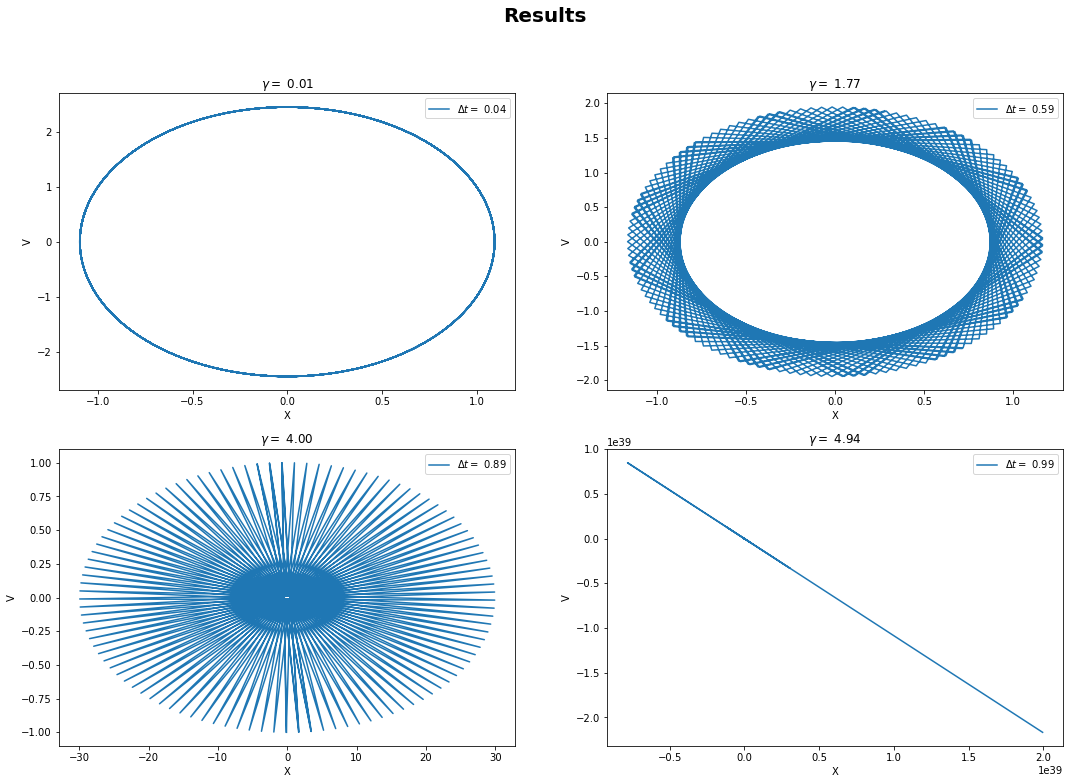

In [5]:
import numpy as np
import matplotlib.pyplot as plt

k = 5
m = 1

def get_dt(k, m):
    dt = 2 * np.sqrt(m / k)    
    shifts = np.array([ -0.95 * dt, -0.3, -0.0001, 0.1])
    return shifts + dt

def get_gamma(k, m, dt):
    return k / m * dt ** 2

def f1(x):
    return - k / m * x

def Leapfrog(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0] # at integer times
    vHistory_ = [v0 + dt / 2. * f1(x0)] # at half-integer times
    tHistory = [0]
    for n in range(N):
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory_.append(vHistory_[-1]+dt*f1(xHistory[-1]))
        tHistory.append(dt*(n+1))
    # define vHistory for integer times
    vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)+1
    return xHistory[1:], vHistory, tHistory[1:]


fig = plt.figure(figsize=(18,12))
fig.suptitle('Results', fontsize=20, fontweight='bold')


times = get_dt(k,m)
ax = [1, 2, 3, 4]
for i, dt in enumerate(times):
    xHistory, vHistory, _ = Leapfrog(f1, 1., 1., dt=dt, N=int(100./dt)) 
    
    ax[i] = fig.add_subplot(2, 2, i+1)
    ax[i].plot(xHistory, vHistory, label='$\Delta t=$ %3.2f' %dt)
    ax[i].set_title('$\gamma = $ %4.2f' %get_gamma(k, m, dt))
    ax[i].set_xlabel('X')
    ax[i].set_ylabel('V')
    ax[i].legend()


In these pictures you can see:
    1. Scheme with excellent approximation (1)
    2. Scheme with bad approximation (2-3) 
    3. Non-convergent scheme (4)

# Problem 4

Consider the velocity Verlet method:
\begin{align}
v_{n+\frac{1}{2}} &= v_n + \frac{1}{2} f_1(x_n) \Delta t \\
x_{n+1} &= x_n + v_{n+\frac{1}{2}} \Delta t\\
v_{n+1} &= v_{n + \frac{1}{2}} + \frac{1}{2} f_1(x_{n+1}) \Delta t
\end{align}

 
Find its global convergence order and verify it experimentally.

### a) Theoretical conclusion

\begin{align}
v_{n+1/2} &= \frac{x_{n+1} - x_n} {\Delta t} - \text{ from the second eq}\\
v_n &= \frac{x_{n+1} - x_n} {\Delta t} - \frac{1}{2} f_1(x_n) \Delta t - \text{ from the first eq}
\end{align}
Put it to the third eq:

\begin{align}
&\frac{x_{n+2} - x_{n+1}} {\Delta t} - \frac{1}{2} f_1(x_{n+1}) \Delta t = \frac{x_{n+1} - x_n} {\Delta t} + \frac{1}{2} f_1(x_{n+1}) \Delta t \\
&\frac{x_{n+2} - 2x_{n+1} + x_n} {\Delta t ^2} = f(x_{n+1})
\end{align}

If we expand the function as Taylor series we will get the $O(\Delta t^3)$ approximation from the last eq.

That's why the Verlet method has global convergence of order 2 ($N = T / \Delta t$)

### b) Experimental conclusion

Error in E at dt=1.000000e-01: 1.258845e-03
Error in E at dt=1.000000e-02: 1.256175e-05
Error in E at dt=1.000000e-03: 1.256149e-07


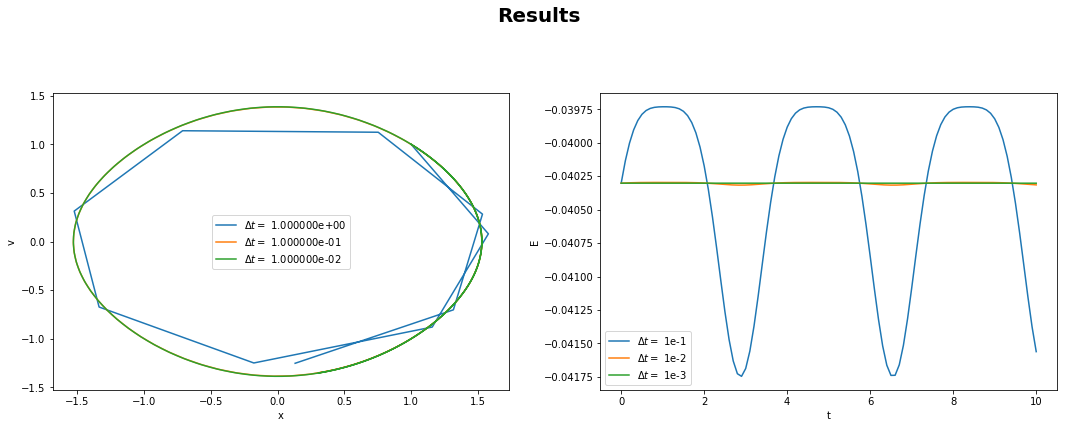

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

def f1(x):
    return - np.sin(x)

def Verlet(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0] # at integer times
    vHistory_ = [v0+dt/2.*f1(x0)] # at half-integer times
    vHistory = [v0] # at integer times
    tHistory = [0]
    
    for n in range(N):
        vHistory_.append(vHistory[-1] + 0.5 * dt * f1(xHistory[-1]))
        xHistory.append(xHistory[-1] + dt * vHistory_[-1])
        vHistory.append(vHistory_[-1] + 0.5 * dt * f1(xHistory[-1]))
        tHistory.append(dt * (n + 1))
        
    assert len(xHistory) == len(vHistory)
    return xHistory[:], vHistory, tHistory[:]

fig = plt.figure(figsize=(18,12))
fig.suptitle('Results', fontsize=20, fontweight='bold')

ax1 = fig.add_subplot(2, 2, 1)
for m in range(0,3):
    dt = 10 ** (-m)
    xHistory, vHistory,_ = Verlet(f1, 1., 1., dt=dt, N=int(10./dt)) 
    ax1.plot(xHistory, vHistory, label='$\Delta t=$ %e' %dt )
ax1.set_xlabel('x')
ax1.set_ylabel('v')
ax1.legend(loc='best')  


def E(X):
    return X[1]*X[1]/2-np.cos(X[0])

ax2 = fig.add_subplot(2, 2, 2)
for m in range(1,4):
    dt = 10**(-m)
    alphaHistory, vHistory, tHistory = Verlet(f1, 1., 1., dt=dt, N=int(10./dt)) 
    Ehistory = [E([alphaHistory[n], vHistory[n]]) for n in range(len(alphaHistory))]
    ax2.plot(tHistory, Ehistory, label='$\Delta t=$ 1e-%d' %m )
    print ('Error in E at dt=%e: %e' %(dt, np.abs(Ehistory[-1]-Ehistory[0])))
ax2.set_xlabel('t')
ax2.set_ylabel('E')
ax2.legend(loc='best')  

These results show that approximation is $O(\Delta t ^2)$

# Problem 5

* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (Xtrain, Ytrain) and the input part of test data (Xtest), and output a prediction for test data (Ypred). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., scikit-learn). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.
* Test your algorithm on real data from UCI repository:
    * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
    * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
    
 Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error 
as the measure of accuracy. Compare your results with results of some linear models implemented in standard predictive modeling software (e.g., Ridge and LinearRegression from scikit-learn).

In [7]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

class SimpleRegressor:
    def __init__(self, alpha = 0):
        self.X = 0
        self.__coef = 0
        self.coef_ = 0
        self.y = 0
        self.N = 0
        self.alpha = alpha
    
    def fit(self, X, y):
        self.N = X.shape[0]
        self.y = y
        X = np.hstack((np.ones(self.N).reshape(self.N,1), X))
        self.X = X
        self.__coef = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X) + self.alpha * np.identity(X.shape[1])), X.transpose()), y) 
        self.coef_ = self.__coef[1:]
        
    def predict(self, X_test):
        N = X_test.shape[0]
        X_test = np.hstack((np.ones(N).reshape(N, 1), X_test))
        return np.dot(X_test, self.__coef) 
        
def getData(dataset = 1):
    assert dataset == 1 or dataset == 2
    if dataset == 1:
        df = pd.read_csv('/Users/rasulkh/Downloads/CASP.csv')
        X = df.iloc[:, 1:]
        y = df['RMSD']
        return X, y
    else: 
        df = pd.read_csv('/Users/rasulkh/Downloads/slice_localization_data.csv')
        X = df.iloc[:, 1:-1]
        y = df['reference']
        return X, y
    
def mean_squared_error(pred, y):
    return np.sqrt(metrics.mean_squared_error(pred, y))

X, y = getData(1) # choose the dataset!
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=0)

alpha = 0.1

model = Ridge(alpha = alpha)
model.fit(X_train,y_train) 
pred = model.predict(X_test)
print ('RMS error for Ridge model:', mean_squared_error(pred, y_test))
print(model.coef_[:10])

model = SimpleRegressor(alpha = alpha)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('RMS error for SimpleRegressor model with regularization:', mean_squared_error(pred, y_test))
print(model.coef_[:10])

model = LR()
model.fit(X_train,y_train) 
pred = model.predict(X_test)
print ('\nRMS error for LR model:', mean_squared_error(pred, y_test))
print(model.coef_[:10])

########################### Here will be mistake for the second dataset due to singular matrix ######################
# it happens beacause this method not robust. Much better: to use optimization method - (stochastic) gradient descent
model = SimpleRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('RMS error for SimpleRegressor model:', mean_squared_error(pred, y_test))
print(model.coef_[:10])

RMS error for Ridge model: 5.44643254401
[  3.73217371e-03   9.96371665e-04   1.60104045e+01  -1.26109545e-01
  -1.08963989e-05  -4.49168722e-02  -9.03466607e-04   8.94527750e-03
   9.87303019e-02]
RMS error for SimpleRegressor model with regularization: 5.44873881444
[  3.71739557e-03   1.02850030e-03   1.56550137e+01  -1.26419060e-01
  -1.09087201e-05  -4.47148893e-02  -9.14850886e-04   8.92933002e-03
   9.14631356e-02]

RMS error for LR model: 5.45535533522
[  4.18457592e-03  -1.04439486e-04   2.78135533e+01  -1.28786959e-01
  -1.12586569e-05  -4.57840013e-02  -9.05203886e-04   8.93608077e-03
   1.08161289e-01]
RMS error for SimpleRegressor model: 5.45535533522
[  4.18457592e-03  -1.04439486e-04   2.78135533e+01  -1.28786959e-01
  -1.12586569e-05  -4.57840013e-02  -9.05203886e-04   8.93608077e-03
   1.08161289e-01]


/Users/rasulkh/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


/Users/rasulkh/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Best alpha for dataset 1 :
Ridge:  5.44631452184
SimpleRegressor:  5.4436975957 

Best alpha for dataset 2 :
Ridge:  10.5545645365
SimpleRegressor:  10.5102048219 



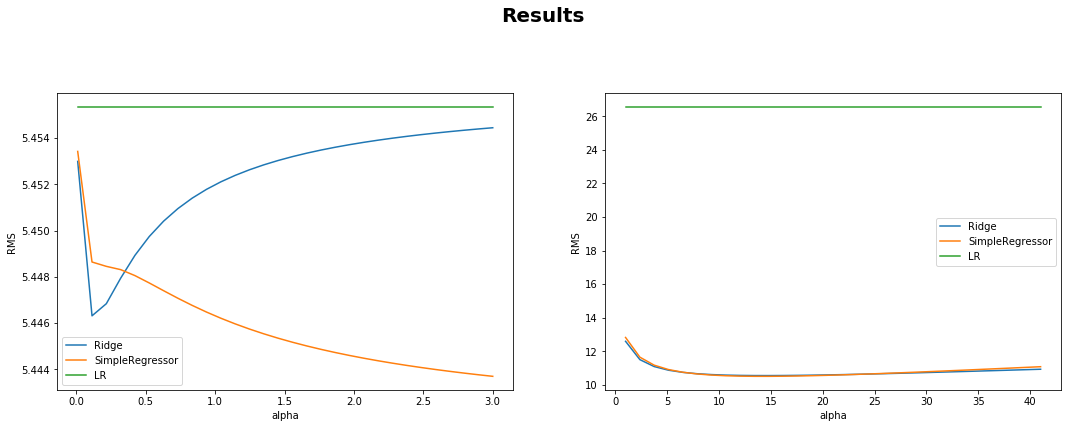

In [8]:
fig = plt.figure(figsize=(18,12))
fig.suptitle('Results', fontsize=20, fontweight='bold')
ax = [1, 2]

for i in range(2):
    X, y = getData(i + 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=0)

    ax[i] = fig.add_subplot(2, 2, i + 1)
    results = [[], []]
    if i == 0:
        alphas = np.linspace(0.01, 3, 30)
    else: 
        alphas = np.linspace(1, 41, 30)
        
    for alpha in alphas:
        model1, model2 = Ridge(alpha), SimpleRegressor(alpha)
        model1.fit(X_train, y_train) 
        model2.fit(X_train, y_train)
        pred1 = model1.predict(X_test)
        pred2 = model2.predict(X_test)
        results[0].append(mean_squared_error(pred1, y_test))
        results[1].append(mean_squared_error(pred2, y_test))
    
    print('Best alpha for dataset', i + 1, ':')
    print('Ridge: ',  np.min(results[0]))
    print('SimpleRegressor: ', np.min(results[1]), '\n')
    
    model3 = LR()
    model3.fit(X_train, y_train)
    pred3 = model3.predict(X_test)
    result3 = mean_squared_error(pred3, y_test)
    
    ax[i].plot(alphas, results[0], label='Ridge')
    ax[i].plot(alphas, results[1], label='SimpleRegressor' )
    ax[i].plot(alphas, [result3] * len(alphas), label = 'LR')
    ax[i].set_xlabel('alpha')
    ax[i].set_ylabel('RMS')
    plt.legend(loc='best')  

Here we see that these results are enough the same